In [1]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors, Crippen

df = pd.read_csv('../Data/BindingDB_1000.csv')
print(df.columns)

Index(['BindingDB Reactant_set_id', 'Ligand SMILES', 'Ligand InChI',
       'Ligand InChI Key', 'BindingDB MonomerID', 'BindingDB Ligand Name',
       'Target Name',
       'Target Source Organism According to Curator or DataSource',
       'IC50 (nM)'],
      dtype='object')


In [2]:
features = []

for i, row in df.iterrows():
    estructura = row['Ligand SMILES']
    
    mol = Chem.MolFromSmiles(estructura)
    
    if mol is not None:
        # Amb les funcions RDKit extreim les dades 
        smiles = row['Ligand SMILES']
        formula = Chem.rdMolDescriptors.CalcMolFormula(mol)
        mw = Descriptors.ExactMolWt(mol)
        logp = Crippen.MolLogP(mol)
        num_hbd = Descriptors.NumHDonors(mol)
        num_hba = Descriptors.NumHAcceptors(mol)
        tpsa = Descriptors.TPSA(mol)
        num_rb = Descriptors.NumRotatableBonds(mol)
        
        # Agregam les dades a una llista
        features.append([smiles, formula, mw, logp, num_hbd, num_hba, tpsa, num_rb])

# cream un data frame amb les dades extretes
df_features = pd.DataFrame(features, columns=['SMILES','Formula', 'Molecular weight', 'LogP', "H-bond donor","H-bond acceptor","TPSA","Rotatable bonds"])

print(len(df_features))
print(df_features.head(5))

1000
                                              SMILES     Formula  \
0  O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(C\C=C\c2cn...  C31H34N6O3   
1  O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CC2CC2)C(=...  C29H34N4O3   
2  OCCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@...  C29H40N2O4   
3  OCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@H...  C28H38N2O4   
4  CCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@H](...  C27H36N2O3   

   Molecular weight    LogP  H-bond donor  H-bond acceptor    TPSA  \
0        538.269239  3.5414             4                5  121.37   
1        486.263091  3.5149             3                4   92.69   
2        480.298808  3.6311             3                4   84.24   
3        466.283158  3.2410             3                4   84.24   
4        436.272593  3.8785             2                3   64.01   

   Rotatable bonds  
0               10  
1                9  
2               12  
3               11  
4                9  


In [3]:
df_smiles = df_features.drop_duplicates(subset=['SMILES'])
print(len(df_smiles))
print(df_smiles.head(5))

829
                                              SMILES     Formula  \
0  O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(C\C=C\c2cn...  C31H34N6O3   
1  O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CC2CC2)C(=...  C29H34N4O3   
2  OCCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@...  C29H40N2O4   
3  OCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@H...  C28H38N2O4   
4  CCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@H](...  C27H36N2O3   

   Molecular weight    LogP  H-bond donor  H-bond acceptor    TPSA  \
0        538.269239  3.5414             4                5  121.37   
1        486.263091  3.5149             3                4   92.69   
2        480.298808  3.6311             3                4   84.24   
3        466.283158  3.2410             3                4   84.24   
4        436.272593  3.8785             2                3   64.01   

   Rotatable bonds  
0               10  
1                9  
2               12  
3               11  
4                9  


In [4]:
#ara necessito afegir una columna que es digui pIC50
#primera versio per la CLASSIFICACIO on tota la columna pIC50 ha de ser 0

df_reg = df_smiles

df_reg.loc[:, 'pIC50'] = -2
print(df_reg.head(5))

                                              SMILES     Formula  \
0  O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(C\C=C\c2cn...  C31H34N6O3   
1  O[C@@H]1[C@@H](O)[C@@H](Cc2ccccc2)N(CC2CC2)C(=...  C29H34N4O3   
2  OCCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@...  C29H40N2O4   
3  OCCCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@H...  C28H38N2O4   
4  CCCCN1[C@H](Cc2ccccc2)[C@H](O)[C@@H](O)[C@@H](...  C27H36N2O3   

   Molecular weight    LogP  H-bond donor  H-bond acceptor    TPSA  \
0        538.269239  3.5414             4                5  121.37   
1        486.263091  3.5149             3                4   92.69   
2        480.298808  3.6311             3                4   84.24   
3        466.283158  3.2410             3                4   84.24   
4        436.272593  3.8785             2                3   64.01   

   Rotatable bonds  pIC50  
0               10     -2  
1                9     -2  
2               12     -2  
3               11     -2  
4                9     -2  


/var/folders/bz/kph7_yt91tx_gtyrx7z046wr0000gn/T/ipykernel_62528/1691151630.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg.loc[:, 'pIC50'] = -2


In [6]:
summary = df_reg.describe()
print(summary)

       Molecular weight        LogP  H-bond donor  H-bond acceptor  \
count        829.000000  829.000000    829.000000       829.000000   
mean         614.292738    3.768603      3.834741         7.178528   
std          119.344984    1.823891      1.845598         2.132557   
min          238.062994   -2.385400      0.000000         3.000000   
25%          549.287257    2.764700      2.000000         6.000000   
50%          610.030506    3.661200      4.000000         7.000000   
75%          678.204514    4.867520      5.000000         8.000000   
max         1116.507772    8.680800     10.000000        14.000000   

             TPSA  Rotatable bonds  pIC50  
count  829.000000       829.000000  829.0  
mean   134.964041        12.038601   -2.0  
std     42.018065         3.990140    0.0  
min     47.020000         1.000000   -2.0  
25%    106.970000         9.000000   -2.0  
50%    126.220000        12.000000   -2.0  
75%    163.090000        15.000000   -2.0  
max    273.260000

1482


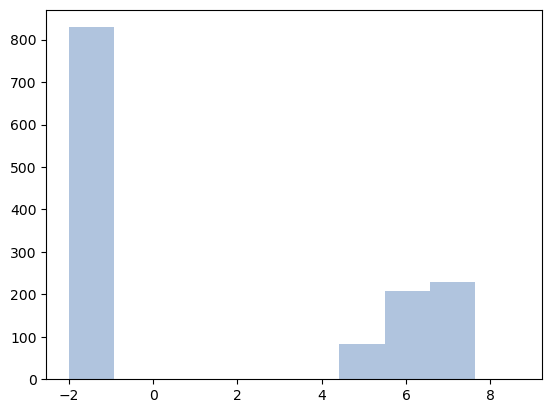

In [8]:
#ens baixem les dades dels que sabem que sin inhibidors
df1 = pd.read_csv('../Data/pIC50_regression.csv')

#unim els dos data frames 
df_reg2 = pd.concat([df1, df_reg])
print(len(df_reg2))

#guardam
df_reg2.to_csv('../Data/pIC50_reg2.csv', index=False)

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.hist(df_reg2['pIC50'], color = "lightsteelblue")

plt.show()